In [1]:
!pip install pyspark pandas matplotlib seaborn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/HouseTS.csv")
df.head()


,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-04-30,61870.0,245000.0,40.723982,130.528256,22.0,29.0,56.0,69.0,89.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202421.064584,Atlanta-Sandy Springs-Alpharetta
2,2012-05-31,125500.0,217450.0,63.913043,119.919216,24.0,40.0,63.0,60.0,144.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202681.309539,Atlanta-Sandy Springs-Alpharetta
3,2012-06-30,153000.0,189900.0,81.598080,105.617353,34.0,46.0,50.0,57.0,126.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202998.603897,Atlanta-Sandy Springs-Alpharetta
4,2012-07-31,165500.0,154000.0,81.598080,83.921175,39.0,49.0,42.0,50.0,80.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,203781.903446,Atlanta-Sandy Springs-Alpharetta


In [5]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["zipcode", "date"])
df.head()

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
41038,2012-03-31,89000.0,252250.0,65.441176,146.728867,3.0,6.0,6.0,12.0,179.0,...,1138.0,769.0,269800.0,1764.0,112.0,2933.0,2933.0,1493.0,195148.086474,Boston-Cambridge-Newton
41039,2012-04-30,124000.0,229500.0,120.984975,124.798061,4.0,7.0,11.0,15.0,262.5,...,1138.0,769.0,269800.0,1764.0,112.0,2933.0,2933.0,1493.0,194446.137500,Boston-Cambridge-Newton
41040,2012-05-31,177500.0,207450.0,120.984975,117.691290,6.0,3.0,14.0,17.0,269.5,...,1138.0,769.0,269800.0,1764.0,112.0,2933.0,2933.0,1493.0,194580.490265,Boston-Cambridge-Newton
41041,2012-06-30,217000.0,203750.0,121.340580,127.536875,5.0,6.0,18.0,22.0,249.0,...,1138.0,769.0,269800.0,1764.0,112.0,2933.0,2933.0,1493.0,195081.437213,Boston-Cambridge-Newton
41042,2012-07-31,130000.0,193900.0,81.948640,118.686333,5.0,9.0,18.0,22.0,222.0,...,1138.0,769.0,269800.0,1764.0,112.0,2933.0,2933.0,1493.0,196403.714599,Boston-Cambridge-Newton


#Trend Analysis

* I computed the median house price for each month using the HouseTS dataset and visualized the long-term price trend from 2012–2024.

In [6]:
trend = (
    df.groupby("date")["price"]     # using price column
      .median()
      .reset_index()
)

trend.head()


,date,price
0,2012-03-31,180273.958966
1,2012-04-30,180958.636832
2,2012-05-31,181448.434411
3,2012-06-30,181621.561276
4,2012-07-31,182168.183151


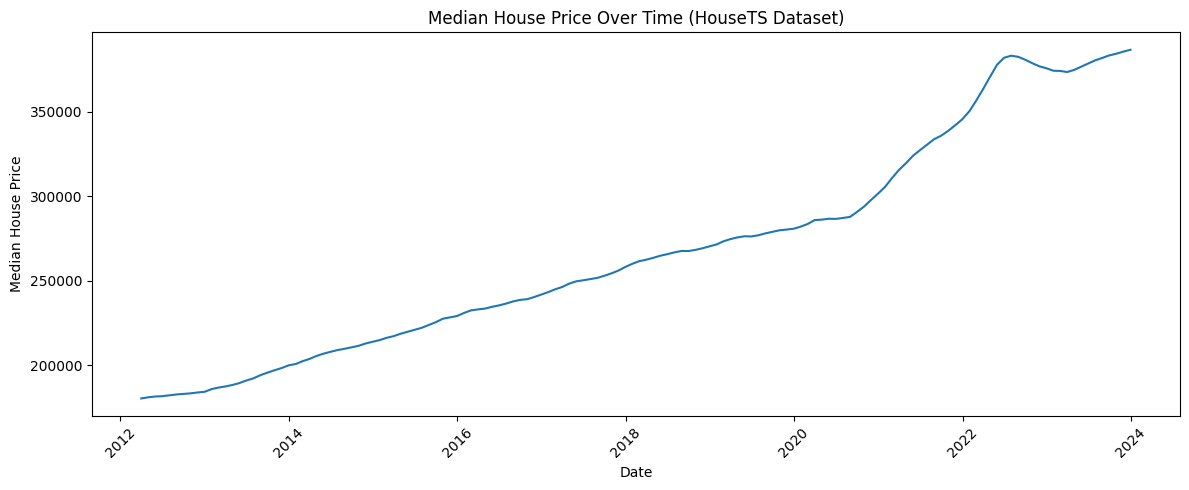

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12,5))
plt.plot(trend["date"], trend["price"])
plt.xlabel("Date")
plt.ylabel("Median House Price")
plt.title("Median House Price Over Time (HouseTS Dataset)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#save
plt.savefig("housets_trend.png")


### Trend Analysis
- The plot clearly shows strong upward appreciation over time, including an acceleration around 2020–2022 and stabilization afterward.

#TOP-10 ZIP CODES BY PRICE GROWTH
* I calculated the first and last available house prices for each ZIP code and ranked them by absolute price growth.

In [9]:
first_last = (
    df.groupby("zipcode")
      .agg(
          first_price=("price", "first"),
          last_price=("price", "last")
      )
      .reset_index()
)

first_last["abs_growth"] = first_last["last_price"] - first_last["first_price"]
first_last["pct_growth"] = (first_last["last_price"] / first_last["first_price"] - 1) * 100

top10 = first_last.sort_values("abs_growth", ascending=False).head(10)
top10


,zipcode,first_price,last_price,abs_growth,pct_growth
1761,78746.0,6.075432e+05,1.788367e+06,1.180824e+06,194.360483
253,3854.0,9.177333e+05,2.090209e+06,1.172476e+06,127.757790
493,21056.0,1.694165e+06,2.859495e+06,1.165329e+06,68.784877
1530,75205.0,7.593117e+05,1.885317e+06,1.126005e+06,148.292899
1546,75225.0,7.012722e+05,1.750951e+06,1.049679e+06,149.682078
204,2468.0,9.512785e+05,1.947469e+06,9.961910e+05,104.721277
212,2493.0,1.107333e+06,2.090646e+06,9.833136e+05,88.800206
209,2481.0,9.923422e+05,1.960044e+06,9.677021e+05,97.516966
196,2459.0,7.824687e+05,1.674872e+06,8.924033e+05,114.049716
1734,78703.0,5.153215e+05,1.374896e+06,8.595744e+05,166.803522


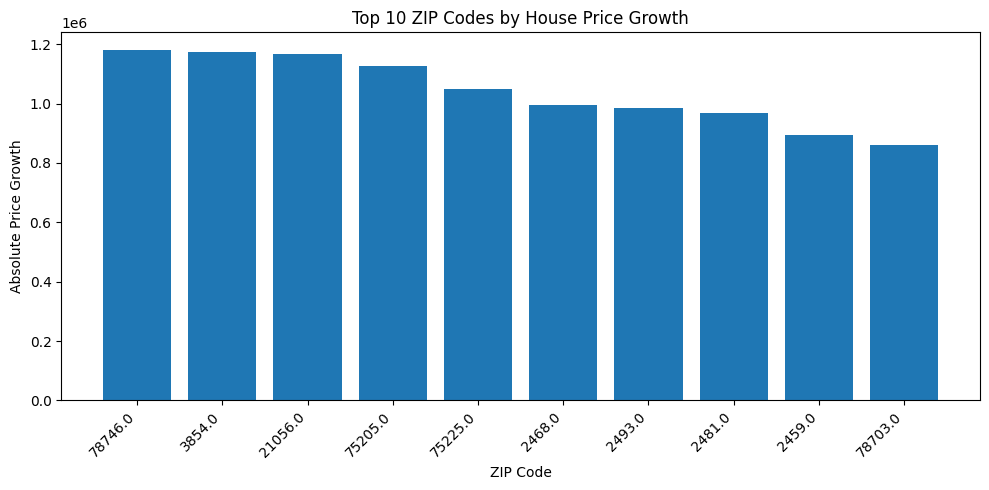

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10,5))
plt.bar(top10["zipcode"].astype(str), top10["abs_growth"])
plt.xlabel("ZIP Code")
plt.ylabel("Absolute Price Growth")
plt.title("Top 10 ZIP Codes by House Price Growth")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#save
plt.savefig("housets_top10_growth.png")


### Quick Analysis
* The bar chart highlights ZIP codes with the largest long-term gains some exceeding $1M in appreciation.